# Sinir ağları ile regresyon modeli

In [ ]:
# Import TensorFlow
import tensorflow as tf

print(tf.__version__)

2.12.0


## Creating data to view and fit

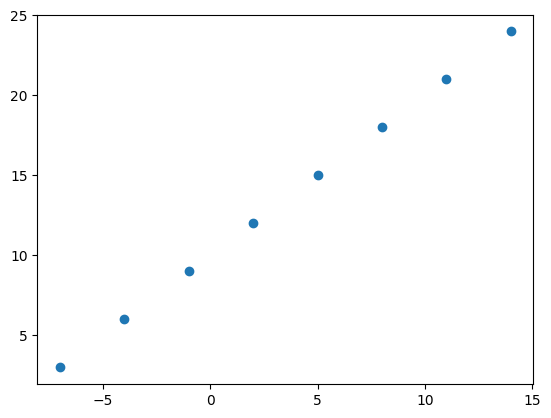

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
# Visualize it
plt.scatter(X,y)

In [ ]:

y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# create a demo tensor for our housing price prediction problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_sahpe=X[0].shape
output_shape=y[0].shape
input_sahpe,output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

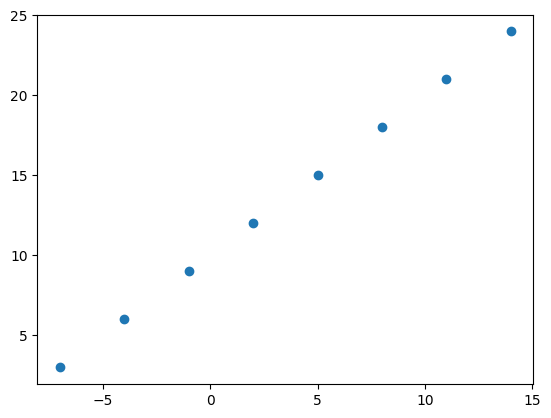

In [ ]:
plt.scatter(X,y)

# Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers,as
well as the hidden layers  of deep learning model
2. **Compiling a model** - define the loss function (in other
words,the function which tells our model how wrong it is) and  
the optimizer
3. **Fitting a model** -letting the model tyr to find patterns
between X and y (features and labels).

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])# sgd short for stochastick gradient descent
# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=20)

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 16.4141 - mae: 16.4141
Epoch 2/20
1/1 [==============================] - 0s 18ms/step - loss: 16.1329 - mae: 16.1329
Epoch 3/20
1/1 [==============================] - 0s 13ms/step - loss: 15.8516 - mae: 15.8516
Epoch 4/20
1/1 [==============================] - 0s 12ms/step - loss: 15.5704 - mae: 15.5704
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 15.2891 - mae: 15.2891
Epoch 6/20
1/1 [==============================] - 0s 13ms/step - loss: 15.0079 - mae: 15.0079
Epoch 7/20
1/1 [==============================] - 0s 9ms/step - loss: 14.7953 - mae: 14.7953
Epoch 8/20
1/1 [==============================] - 0s 11ms/step - loss: 14.6628 - mae: 14.6628
Epoch 9/20
1/1 [==============================] - 0s 10ms/step - loss: 14.5303 - mae: 14.5303
Epoch 10/20
1/1 [==============================] - 0s 11ms/step - loss: 14.3978 - mae: 14.3978
Epoch 11/20
1/1 [==============================] - 0s 12ms/ste

Bu TensorFlow kodu, tek katmanlı bir derin öğrenme modeli oluşturur. Model, yalnızca bir yoğun katman içerir. Yoğun bir katman, her bir nöronun, girdi verileriyle ağırlıkları çarpıp bir bias ekleyerek çıktı ürettiği bir katmandır.

Bu örnekte, katmanın tek bir nöronu vardır ve bu nöron, girdi verilerinin her biriyle çarpılan bir ağırlık ve bir bias ekleyerek çıktı üretir. Modelin amaç, verilerin özelliklerini öğrenmek ve doğru sonuçları çıkarmak için bu ağırlıkları ve bias'ı optimize etmektir.

Model, tf.keras.Sequential sınıfını kullanarak oluşturulmuştur. Bu sınıf, bir dizi katmanı sıralı olarak bir araya getirir ve bir model oluşturur. Bu örnekte, yalnızca bir katman olduğundan, Sequential sınıfı kullanımı basit olmuşt

Bu TensorFlow kodu, oluşturulan modelin derlenmesini sağlar.

model.compile fonksiyonu, model için kayıp fonksiyonu (loss function) ve optimizer'ı belirlemek için kullanılır.

Bu örnekte, kayıp fonksiyonu olarak "mean absolute error" (ortalama mutlak hata) kullanılır. Bu kayıp fonksiyonu, modelin tahminleri ile gerçek değerler arasındaki mutlak farkın ortalamasını hesaplar.

Ayrıca, optimizer olarak "Stochastic Gradient Descent" (SGD) kullanılır. SGD, öğrenme hızını (learning rate) ve momentumu (momentum) gibi hiperparametreleri ayarlayarak modelin parametrelerini (ağırlıklar ve biaslar) optimize eder.

Bu örnekte, optimizer olarak varsayılan SGD ayarları kullanılmıştır. Ancak, hiperparametrelerin ayarlanması, modelin performansını artırabilir.

Sonuç olarak, model.compile fonksiyonu, modelin eğitilmesi için gerekli olan kayıp fonksiyonu ve optimizer'ın belirlenmesini sağlar.

Bu TensorFlow kodu, verileri kullanarak modelin eğitimini gerçekleştirir.

model.fit fonksiyonu, modelin verilerle eğitilmesini sağlar. Bu fonksiyon, veri kümesini (X ve y), epoch sayısını (epochs) ve diğer eğitim parametrelerini alır.

Bu örnekte, veriler, tf.expand_dims fonksiyonu kullanılarak yeniden boyutlandırılmıştır. Bu fonksiyon, tensör boyutunu genişletmek için kullanılır. Burada, X tensörü son boyutuna bir boyut eklenerek yeniden boyutlandırılmıştır. Bu, modelin girdi olarak bir dizi vektör yerine bir dizi skaler almasını sağlar.

epochs=5 parametresi, modelin veriler üzerinde beş kez eğitilmesini sağlar. Her epoch, tüm veri kümesi üzerindeki bir iterasyonu ifade eder.

Eğitim işlemi, kayıp fonksiyonu ve optimizer'a göre modelin ağırlıklarını ve bias'larını günceller. Bu, modelin verileri daha iyi tahmin edebilecek şekilde optimize edilmesini sağlar.

Sonuç olarak, model.fit fonksiyonu, modelin verilerle eğitilmesini sağlar ve modelin performansını artırır.

In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# try and make a prediction  using our model
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 163ms/step


array([[2.0051706]], dtype=float32)

Modelimizi Geliştirmek(Improving our model )
1-Modelimizin adımlarını değiştirerek modelimizi iyileştirebiliriz

2-Modelimize daha fazla katman ekleyebiliriz yani Dense=1  yani nöronlarımızı   5 belki 10 yapabiliriz

3-Optimizasyon fonksiyonumu değiştirebiliriz öğrenme adımımızı değiştirebiliriz

4-epochs modelimizin daha fazla veri üzerinde eğitilmesine olanak sağlar

In [ ]:
# Let's rebuild our model

# 1.create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# 3.Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
# expand_dims(X, axis=-1) numpy kütüphanesi içinde yer alan bir fonksiyondur ve verilen diziyi veya matrisi, belirtilen eksen boyunca bir boyut artırarak yeni bir dizi veya matris döndürür.

Epoch 1/100
1/1 [==============================] - 1s 837ms/step - loss: 10.1541 - mae: 10.1541
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 10.0216 - mae: 10.0216
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 9.8891 - mae: 9.8891
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7566 - mae: 9.7566
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6241 - mae: 9.6241
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.4916 - mae: 9.4916
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 9.3591 - mae: 9.3591
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 9.2266 - mae: 9.2266
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0941 - mae: 9.0941
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 8.9616 - mae: 8.9616
Epoch 11/100
1/1 [==============================] - 0s 21ms/step

In [ ]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our  model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[30.146442]], dtype=float32)

In [ ]:
# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2.Compile The model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['mae'])
# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 19.5907 - mae: 19.5907
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.5847 - mae: 19.5847
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 19.5787 - mae: 19.5787
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 19.5727 - mae: 19.5727
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 19.5667 - mae: 19.5667
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 19.5607 - mae: 19.5607
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 19.5547 - mae: 19.5547
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 19.5487 - mae: 19.5487
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 19.5427 - mae: 19.5427
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 19.5367 - mae: 19.5367
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Let's see if we can make another to improve our model
# 1.create the model (this time with an extra hidden layer with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
#tf.keras.layers.Dense(100,activation='relu')  100 nöronlu bir saklı katman oluşturur ve
# "rectified linear unit (ReLU)" aktivasyon fonksiyonu kullanarak nöronların çıkışını hesaplar. Bu katman, girdi katmanındaki tüm nöronlar çıkış katmanındaki tüm nöronlara bağlıdır.
# tf.keras.layers.Dense(1): 1 nöronlu bir çıkış katmanı oluşturur. Bu katman, girdi katmanındaki tüm nöronlar saklı katmandaki tüm nöronlara bağlıdır. Bu katman, çıkışı doğrudan hesaplar.
])
# 100: katmandaki nöron sayısıdır. Bu örnekte, 100 nöronlu bir katman oluşturulacaktır.
#activation='relu': aktivasyon fonksiyonunu belirler. Bu örnekte, "rectified linear unit (ReLU)" aktivasyon fonksiyonu kullanılacaktır.
#ReLU, genellikle derin öğrenme modellerinde tercih edilen bir aktivasyon fonksiyonudur. Bu fonksiyon, girdinin negatif değerleri için
#sıfır çıkışı verirken, pozitif değerlerin tümünü doğrudan çıkış olarak verir.
# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])
# 3.Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 931ms/step - loss: 12.2962 - mae: 12.2962
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2183 - mae: 12.2183
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1404 - mae: 12.1404
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0626 - mae: 12.0626
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9847 - mae: 11.9847
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9068 - mae: 11.9068
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8288 - mae: 11.8288
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7508 - mae: 11.7508
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11.6729 - mae: 11.6729
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5949 - mae: 11.5949
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Lets's try to make prediction
model.predict([17.0])# Overfiting yapmış olduk yani modelimiz veri setimizi ezberledi dışarıdan bir veri aldğı zaman ise overfit olduğu için hata oranı yüksek yaptı

1/1 [==============================] - 0s 122ms/step


array([[31.280043]], dtype=float32)

#### Evaluting a model

Model oluştururken çok fazla deney yapmamı lazım

Modeli değerlendiririken ise modeli anlamdarmamız için çok fazla Görseleştirme yapmamız lazım

* The data - what data are you working with? What does it look like?
The model itself - what does the architecture look like? What are the different shapes?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
import numpy as np

In [ ]:
# Make a bigger dateset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dateset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

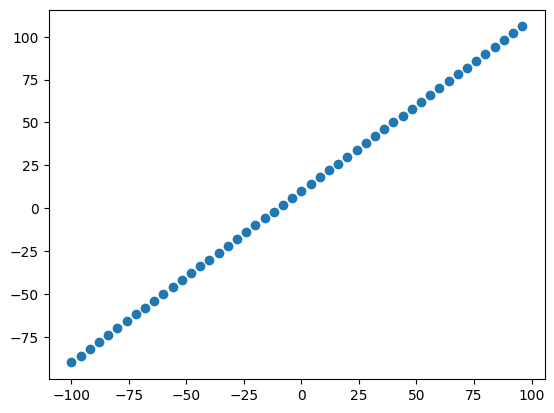

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [ ]:
# Check the length of many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train=X[:40]# firs 40 are training samples(%80 of the data)
y_train=y[:40]
X_test=X[40:]# last 10 are testing samples (%20 of the data)
y_test=y[40:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets.. let's visualize it again

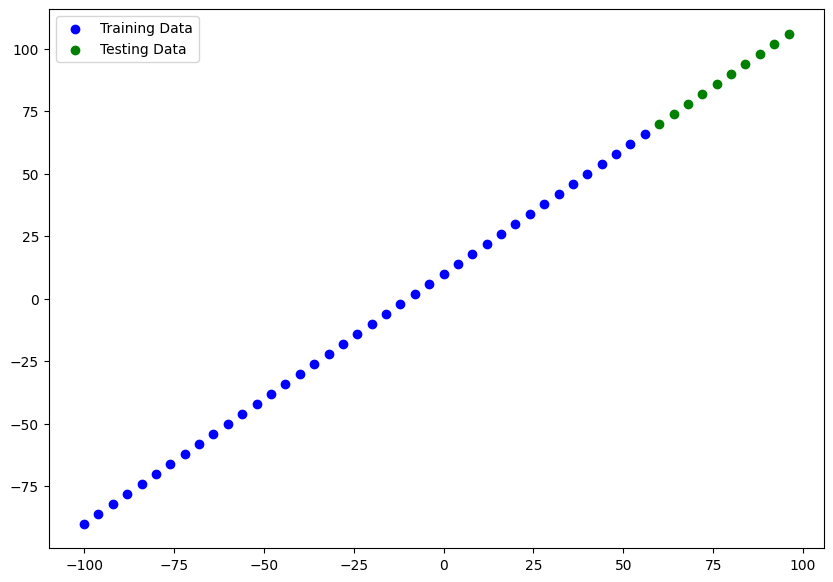

In [ ]:
plt.figure(figsize=(10,7))
# Plot traning data in blue
plt.scatter(X_train,y_train,color='blue',label='Training Data')
# Plot test data in green
plt.scatter(X_test,y_test,color='green',label='Testing Data')
# Show a legend
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Let's have a look at how to build a neural network for our data
# 1.Creaate a model
model=tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
# Sıralı modelinize aşağıdaki gibi bir giriş katmanı eklemeniz gerekir: model = tf.keras.Sequential([tf.keras.Input(shape=(1,)), tf.keras.layers.Dense(1) ]).

# Girdi katmanı, gerçekten de skaler girdiler beklediğinizi belirtir.

])
# 2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# 3.Fit the model
#model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)
#model.fit(X_train,y_train,epochs=100)

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 1.Create a model
model=tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),# Girdi katmanı olarak skaler bir değer vereceiğimizi belirttik
    tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
],name='model_1' )
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# tf.keras.layers.Dense(1, input_shape=[1]) kodu, bir yoğun bağlantılı (fully connected) katmanı oluşturur. Bu katman, bir önceki katmandaki tüm birimlerle (nöronlarla) tamamen bağlıdır.

# Bu katmanın ilk parametresi, çıkış birimlerinin (nöronlarının) sayısını belirtir, bu örnekte 1'dir. Yani bu katman, tek bir sayısal çıktı üretir.

# input_shape parametresi ise ilk katmanda kullanılacak olan girdi verisinin boyutunu belirtir. Bu örnekte, girdi verisi tek boyutlu bir dizi olduğundan, input_shape değeri de [1] olarak belirtilmiştir.

# Bir sonraki katmanın girdi boyutunu belirtmek için input_shape parametresini kullanmanıza gerek yoktur. Keras, otomatik olarak bir sonraki katmanın girdi boyutunu önceki katmanın çıkış boyutuna göre ayarlayacaktır.

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params:modelimizdeki toplam parametre sayısıdır

* Trainable params:Modelimizi günceledikçe değişen parametrelerdir

* Non-trainable params:Bu pramaetreler eğtim sırasında güncelenemez

In [ ]:
# Let's fit our model to the training data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
# get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


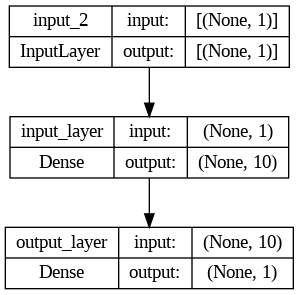

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize prediction it's a good idea to plot them against the grund truth labels.


In [ ]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 45ms/step


array([[ 75.8044  ],
       [ 80.74279 ],
       [ 85.68119 ],
       [ 90.61959 ],
       [ 95.55798 ],
       [100.496376],
       [105.43478 ],
       [110.37317 ],
       [115.31156 ],
       [120.24997 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  # Plots training data ,test data and compares predictions,
  plt.figure(figsize=(12,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c='b',label='Training data')
  # Plot test data in green
  plt.scatter(test_data,test_labels,c='g',label='Testing data')
  # Plot the predictions in the red
  plt.scatter(test_data,predictions,c='r',label='Predictions')
  # Show the legend
  plt.legend(loc='upper left')
  plt.show()

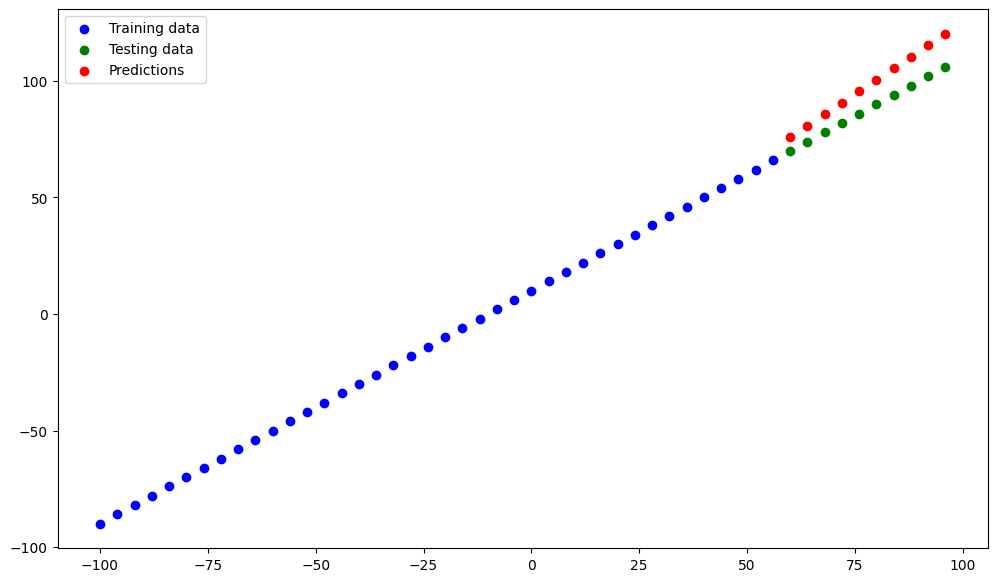

In [ ]:
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred)

### Evaluting our model's predictions with regression evaluatin metrics

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

# model.evaluate(X_test, y_test) kodu, makine öğrenimi modelinin test veri setindeki
# performansını ölçmek için kullanılır. Bu, modelin gerçek dünya verilerinde ne kadar iyi çalıştığını anlamak için kullanışlı bir yöntemdir.

# Öncelikle, test veri setindeki girdileri (X_test) kullanarak modelin tahminlerini yapar ve bu tahminleri gerçek hedef çıktılar (y_test)
# ile karşılaştırır. Daha sonra, belirtilen metrikler üzerinden modelin performansını hesaplar ve bu metrikler aracılığıyla modelin doğruluğunu, hesaplar

1/1 [==============================] - 0s 126ms/step - loss: 10.0272 - mae: 10.0272


[10.027180671691895, 10.027180671691895]

In [ ]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.717361, 11.302884, 10.063762, 10.123919, 11.423193, 13.897825,
       17.547821, 22.373169, 27.31156 , 32.24997 ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 75.8044  ],
       [ 80.74279 ],
       [ 85.68119 ],
       [ 90.61959 ],
       [ 95.55798 ],
       [100.496376],
       [105.43478 ],
       [110.37317 ],
       [115.31156 ],
       [120.24997 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.8044  ,  80.74279 ,  85.68119 ,  90.61959 ,  95.55798 ,
       100.496376, 105.43478 , 110.37317 , 115.31156 , 120.24997 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.027181>

In [ ]:
# calculate the mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=107.80919>

In [ ]:
# Make some functions to reuse MAE MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model(Modelimizi iyileştirmek için denemelerde bulunacağız)
* 1.Get more data - get more examples for your model to train on (more opportunities to learn patterns).
* 2.Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* 3. Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create the model
model_1=tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),# Girdi katmanı olarak skaler girdi beklediğimizi modelimize belirttik
    tf.keras.layers.Dense(1)
])
# 2.Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# 3.Fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 64.3714 - mae: 64.3714
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 29.3916 - mae: 29.3916
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4660 - mae: 10.4660
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9390 - mae: 12.9390
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9801 - mae: 11.9801
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2721 - mae: 9.2721
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4405 - mae: 8.4405
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0497 - mae: 9.0497
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.3943 - mae: 18.3943
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9277 - mae: 9.9277
Epoch 11/100
2/2 [==============================] - 0s 10ms/step -

1/1 [==============================] - 0s 43ms/step


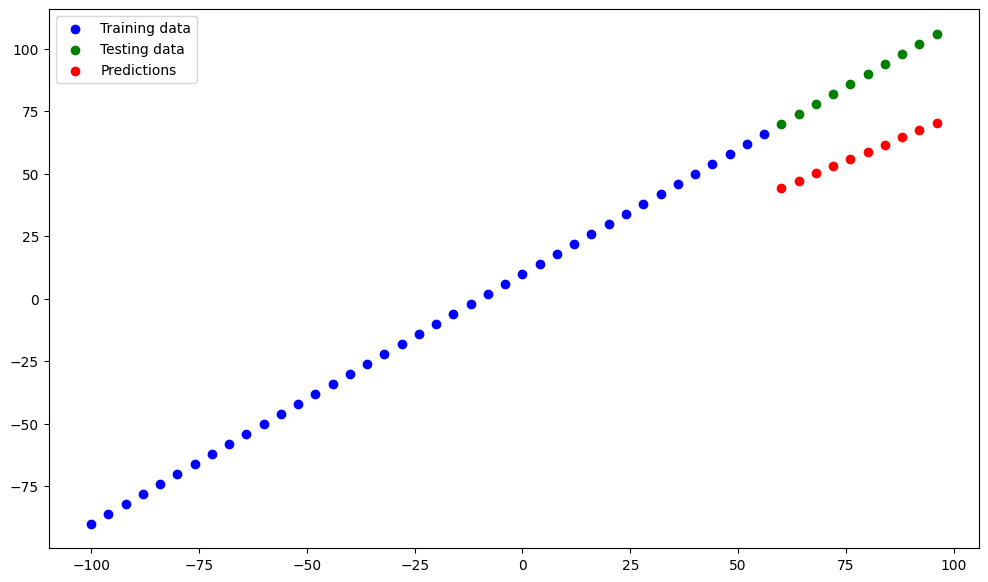

In [ ]:
# Make an plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# calculate model_1 evaluation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.63468>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.9059>)

In [ ]:
y_test.shape,y_preds_1.shape

(TensorShape([10]), (10, 1))

**Build** model_2

* 2 dense layer,trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)# modelde iki katman kullanılması, daha karmaşık bir ilişkiyi öğrenmesine izin verir.

])
# 2.Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# 3.Fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 33.0573 - mae: 33.0573
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 27.6844 - mae: 27.6844
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 31.5095 - mae: 31.5095
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2447 - mae: 14.2447
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 20.0127 - mae: 20.0127
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6303 - mae: 8.6303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 16.1906 - mae: 16.1906
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 16.6957 - mae: 16.6957
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 29.0954 - mae: 29.0954
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 13.6757 - mae: 13.6757
Epoch 11/100
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 48ms/step


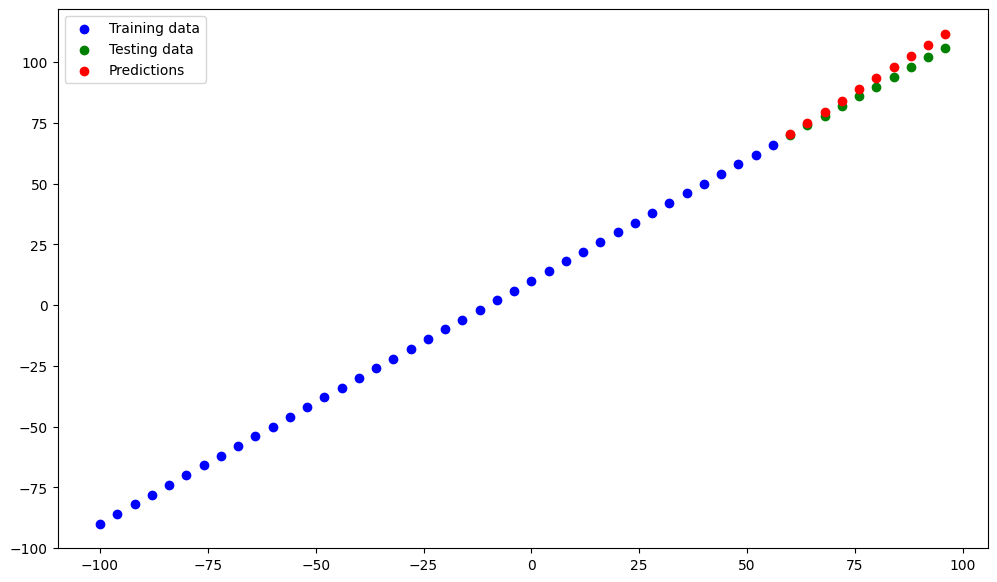

In [ ]:
# Make an plot predictions for model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# calculate model_2 evaluation metrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.105877>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.451585>)

**Build** model_3

In [ ]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model
model_3=tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),# Girdimizin sklaer olduğunu belirttik
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)# modelde iki katman kullanılması, daha karmaşık bir ilişkiyi öğrenmesine izin verir.

])
# 2.Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# 3.Fit the model
model_3.fit(X_train,y_train,epochs=500,verbose=0)# ,epochs=500 yaparak overfiting yaptık yani modelimizi train datayı ezberlediği için test datası üzerinden iyi bir sonuç gösteremedi yani geneleme yapamadı

1/1 [==============================] - 0s 46ms/step


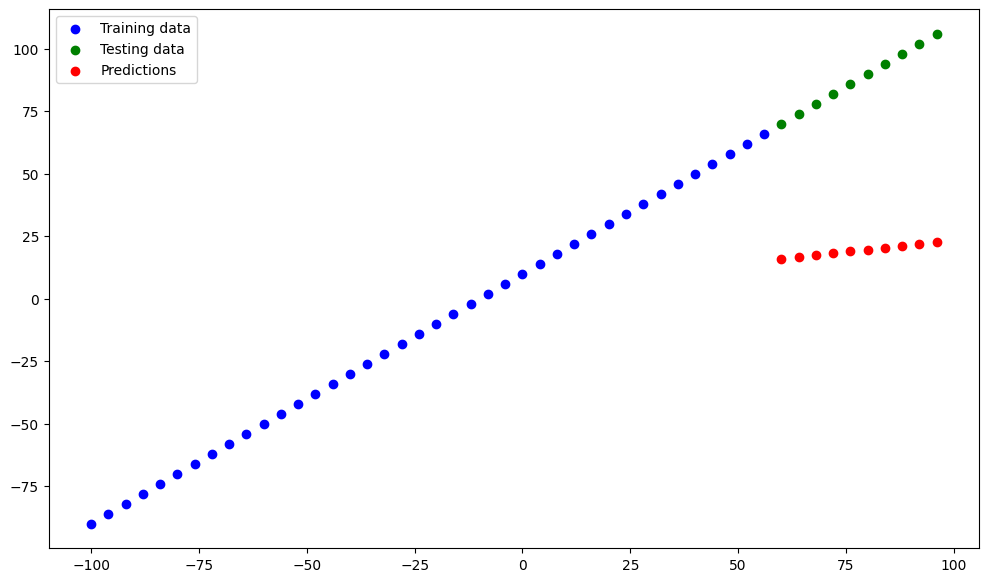

In [ ]:
# Make an plot predictions for model_3
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# calculate model_3 evaluation metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.702965>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4806.5776>)

### comparing the result of our experiments(Model sonuçlarını karşılaştırma)

In [ ]:
# Let's compare our model's result using a pandas Dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mae_3.numpy()]]
all_results=pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,30.634680,948.905884
1,model_2,3.105877,12.451585
2,model_3,68.702965,68.702965


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

## Saving our models

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

* The SavedModel format (default).

* The HDF5 format.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


## Loading in saved model

# Load in the SavedModel format model


In [ ]:
loaded_SavedModel_format=tf.keras.models.load_model('best_model_SavedModel_format')

In [ ]:
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_SavedModel_format.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 43ms/step


True

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 44ms/step


True

## Download a model (or any other file) Google Colab

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
# chech out the insuarance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.isnull().sum()# Datada eksik veri varmı kontrol ettik

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance.select.dtypes()